In [1]:

# Import numpy library for handling linear algebra and numerical operations
import numpy as np  

# Import pandas library for data manipulation, especially for working with data frames
import pandas as pd  

# Import OS library to interact with the file system and list files in the data directory
import os

# Walk through the Kaggle input directory, print each file path to verify data presence
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        # Print full path of each file found in the input directory
        print(os.path.join(dirname, filename))


/kaggle/input/weather-long-term-time-series-forecasting/cleaned_weather.csv


In [2]:

# Import Matplotlib library's 'pyplot' module for generating visualizations like plots and graphs
import matplotlib.pyplot as plt  

# Import Seaborn library, which provides statistical data visualization built on top of Matplotlib
import seaborn as sns  

# Import statistical functions from SciPy, a library used for scientific and technical computing
from scipy import stats  

# Import the StandardScaler from scikit-learn to normalize or scale numerical features
from sklearn.preprocessing import StandardScaler  


In [5]:

# Define a function to load and preprocess weather data from a CSV file
def data_loading_and_preparing(file_path):
    # Read the CSV file located at the specified file path into a Pandas DataFrame
    data = pd.read_csv(file_path)
    
    # Convert the 'date' column from a string to a datetime format, which allows for time-based operations
    data['date'] = pd.to_datetime(data['date'])
    
    # Set 'date' column as the index of the DataFrame for easier time-series analysis
    data.set_index('date', inplace=True)
    
    # Extract the 'hour' part from the datetime index and add it as a new column in the DataFrame
    data['hour'] = data.index.hour
    
    # Extract the 'day' part from the datetime index and add it as a new column in the DataFrame
    data['day'] = data.index.day
    
    # Extract the 'month' part from the datetime index and add it as a new column in the DataFrame
    data['month'] = data.index.month
    
    # Return the modified DataFrame with added time-based features
    return data


In [6]:
data = data_loading_and_preparing('/kaggle/input/weather-long-term-time-series-forecasting/cleaned_weather.csv')
data.head()

,p,T,Tpot,Tdew,rh,VPmax,VPact,VPdef,sh,H2OC,...,wd,rain,raining,SWDR,PAR,max. PAR,Tlog,hour,day,month
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,5.49,...,224.3,0.0,0.0,0.0,0.0,0.0,11.45,0,1,1
2020-01-01 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,5.45,...,206.8,0.0,0.0,0.0,0.0,0.0,11.51,0,1,1
2020-01-01 00:30:00,1008.66,0.73,273.21,-1.48,85.1,6.44,5.48,0.96,3.39,5.43,...,197.1,0.0,0.0,0.0,0.0,0.0,11.60,0,1,1
2020-01-01 00:40:00,1008.64,0.37,272.86,-1.64,86.3,6.27,5.41,0.86,3.35,5.37,...,206.4,0.0,0.0,0.0,0.0,0.0,11.70,0,1,1
2020-01-01 00:50:00,1008.61,0.33,272.82,-1.50,87.4,6.26,5.47,0.79,3.38,5.42,...,209.6,0.0,0.0,0.0,0.0,0.0,11.81,0,1,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52696 entries, 2020-01-01 00:10:00 to 2021-01-01 00:00:00
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   p         52696 non-null  float64
 1   T         52696 non-null  float64
 2   Tpot      52696 non-null  float64
 3   Tdew      52696 non-null  float64
 4   rh        52696 non-null  float64
 5   VPmax     52696 non-null  float64
 6   VPact     52696 non-null  float64
 7   VPdef     52696 non-null  float64
 8   sh        52696 non-null  float64
 9   H2OC      52696 non-null  float64
 10  rho       52696 non-null  float64
 11  wv        52696 non-null  float64
 12  max. wv   52696 non-null  float64
 13  wd        52696 non-null  float64
 14  rain      52696 non-null  float64
 15  raining   52696 non-null  float64
 16  SWDR      52696 non-null  float64
 17  PAR       52696 non-null  float64
 18  max. PAR  52696 non-null  float64
 19  Tlog      52696 non-null  float6

In [8]:
def statistical_info(data):
    basic_stats = data.describe()
    correlations = data.corr()
    return basic_stats,correlations

In [9]:
basic_stats,correlations = statistical_info(data)
print(basic_stats)
print(correlations)

                  p             T          Tpot          Tdew            rh  \
count  52696.000000  52696.000000  52696.000000  52696.000000  52696.000000   
mean     989.989233     10.818241    284.796938      5.409105     72.487133   
std        9.207149      7.468671      7.616995      5.956722     19.230260   
min      955.580000     -6.440000    266.190000    -13.810000     21.160000   
25%      984.800000      4.590000    278.550000      0.777500     58.820000   
50%      990.920000     10.230000    284.320000      5.260000     75.400000   
75%      995.930000     16.180000    290.260000      9.700000     87.900000   
max     1020.070000     34.800000    309.130000     20.500000    100.000000   

              VPmax         VPact         VPdef            sh          H2OC  \
count  52696.000000  52696.000000  52696.000000  52696.000000  52696.000000   
mean      14.487046      9.676828      4.810131      6.111159      9.782341   
std        7.632960      4.023504      5.539320    

In [10]:
 def analyze_daily_patterns(data):
    """
    Analyze daily patterns in temperature, humidity, and radiation
    """
    daily_stats = data.resample('D').agg({
        'T': ['mean', 'min', 'max'],
        'rh': 'mean',
        'SWDR': 'sum',
        'rain': 'sum'
    })
    
    return daily_stats

    
daily_stats = analyze_daily_patterns(data)
daily_stats.head()


T                     rh     SWDR rain
                mean   min   max       mean      sum  sum
date                                                     
2020-01-01 -0.514196 -3.46  4.58  86.429301  8250.91  0.0
2020-01-02 -1.056319 -5.78  6.47  80.206042  9570.44  0.0
2020-01-03  4.835278  0.69  8.17  81.975000  1665.99  0.3
2020-01-04  3.784931  1.47  6.61  80.899861  1157.79  4.8
2020-01-05  2.735000  1.47  4.43  76.422639  4572.03  0.0

In [11]:
def analyze_extreme_events(df):
    """
    Identify and analyze extreme weather events
    """
    extremes = {
        'highest_temp': df['T'].max(),
        'lowest_temp': df['T'].min(),
        'highest_wind': df['wv'].max(),
        'max_daily_rain': df.resample('D')['rain'].sum().max(),
        'hottest_day': df.resample('D')['T'].mean().idxmax(),
        'coldest_day': df.resample('D')['T'].mean().idxmin(),
        'prevailing_wind_direction': df.groupby('wd')['wv'].count().idxmax()
    }
    
    return extremes

extremes = analyze_extreme_events(data)
for event, value in extremes.items():
    print(f"{event}: {value}")

highest_temp: 34.8
lowest_temp: -6.44
highest_wind: 13.77
max_daily_rain: 46.4
hottest_day: 2020-08-08 00:00:00
coldest_day: 2020-01-25 00:00:00
prevailing_wind_direction: 210.3


/tmp/ipykernel_30/1275853447.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


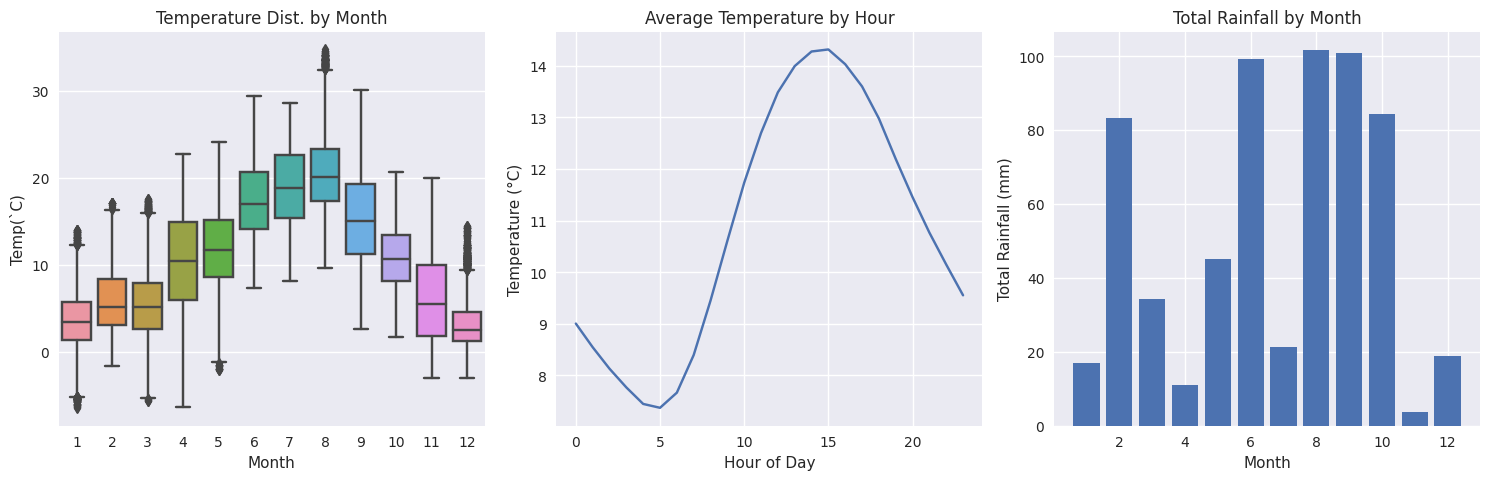

In [14]:
def weather_patterns(data):
    plt.style.use('seaborn')
    fig = plt.figure(figsize=(15,9))
    ax1 = plt.subplot(231)
    sns.boxplot(data=data,x='month',y='T',ax=ax1)
    ax1.set_title('Temperature Dist. by Month')
    ax1.set_xlabel("Month")
    ax1.set_ylabel('Temp(`C)')
    
    ax2 = plt.subplot(232)
    hourly_temp = data.groupby('hour')['T'].mean()
    ax2.plot(hourly_temp.index, hourly_temp.values)
    ax2.set_title('Average Temperature by Hour')
    ax2.set_xlabel('Hour of Day')
    ax2.set_ylabel('Temperature (°C)')
    
    # Rainfall pattern by month
    ax3 = plt.subplot(233)
    monthly_rain = data.groupby('month')['rain'].sum()
    ax3.bar(monthly_rain.index, monthly_rain.values)
    ax3.set_title('Total Rainfall by Month')
    ax3.set_xlabel('Month')
    ax3.set_ylabel('Total Rainfall (mm)')
        
    plt.tight_layout()
    return fig

fig = weather_patterns(data)

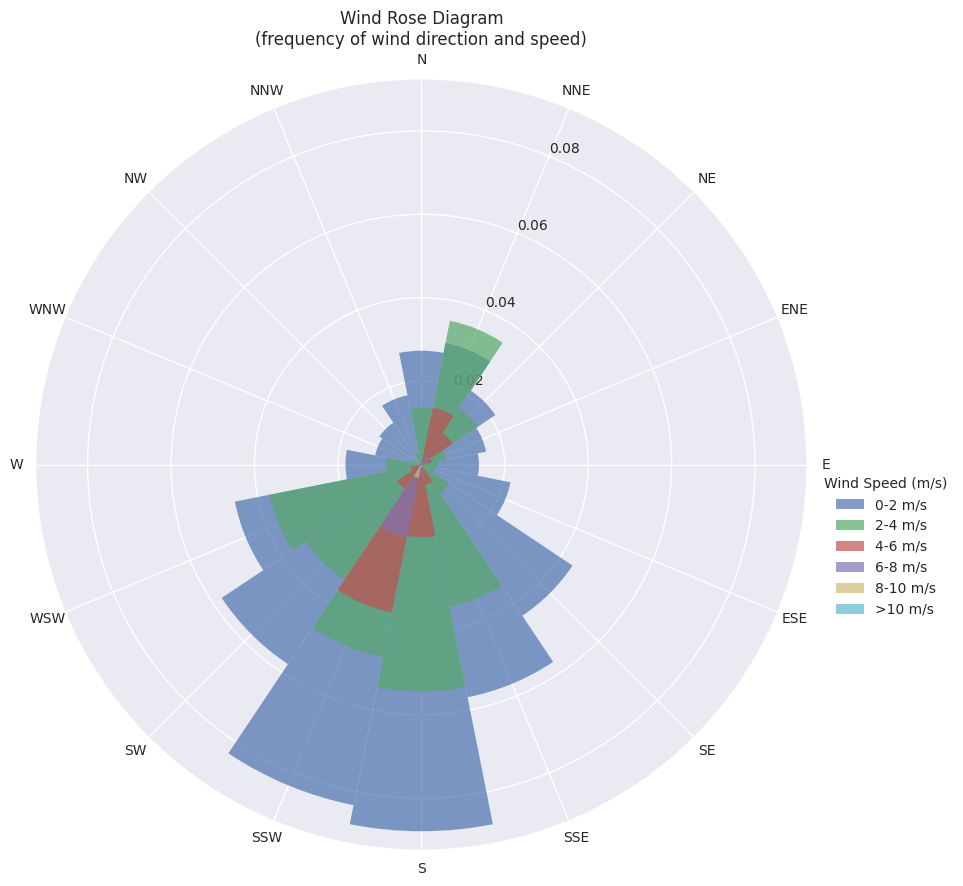

In [17]:
def create_wind_rose(df):
    """
    Create a wind rose diagram
    """
    # Convert wind directions to radians
    wd_rad = np.radians(df['wd'])
    
    # Define wind speed bins
    speed_bins = [0, 2, 4, 6, 8, 10, np.inf]
    speed_labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '>10']
    
    # Create direction bins (16 compass directions)
    dir_bins = np.linspace(0, 2*np.pi, 17)
    dir_labels = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE',
                 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
    
    # Categorize wind speeds
    df['speed_cat'] = pd.cut(df['wv'], bins=speed_bins, labels=speed_labels)
    
    # Create figure
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='polar')
    
    # Plot each speed category
    for speed_label in speed_labels:
        mask = df['speed_cat'] == speed_label
        if mask.any():
            hist, _ = np.histogram(wd_rad[mask], bins=dir_bins)
            hist = hist / len(df)  # Convert to frequency
            width = dir_bins[1] - dir_bins[0]
            ax.bar(dir_bins[:-1], hist, width=width, bottom=0.0, 
                  label=f'{speed_label} m/s', alpha=0.7)
    
    # Customize the plot
    ax.set_theta_direction(-1)
    ax.set_theta_zero_location('N')
    ax.set_thetagrids(np.degrees(dir_bins[:-1]), dir_labels)
    ax.set_title('Wind Rose Diagram\n(frequency of wind direction and speed)')
    plt.legend(title='Wind Speed (m/s)', bbox_to_anchor=(1.2, 0.5))
    
    return fig
    
wind_rose_fig = create_wind_rose(data)


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [19]:
class WeatherPredictor:
    def __init__(self, df):
        """
        Initialize the weather predictor with dataset and configure GPU
        """
        self.df = df
        self.scalers = {}
        self.lstm_model = None
        
        # Configure GPU memory growth
        gpus = tf.config.list_physical_devices('GPU')
        if gpus:
            try:
                for gpu in gpus:
                    tf.config.experimental.set_memory_growth(gpu, True)
                print(f"GPU(s) detected: {len(gpus)}")
                print("Using GPU for training")
            except RuntimeError as e:
                print(f"GPU configuration error: {e}")
        else:
            print("No GPU detected. Using CPU for training")
        
    def prepare_data_for_lstm(self, target_variable, sequence_length=24, forecast_horizon=24):
        """
        Prepare data for LSTM model with multi-variable input
        """
        features = ['T', 'rh', 'p', 'wv', 'SWDR']
        data = self.df[features].copy()
        
        # Scale the data
        for feature in features:
            self.scalers[feature] = MinMaxScaler()
            data[feature] = self.scalers[feature].fit_transform(data[feature].values.reshape(-1, 1))
        
        X, y = [], []
        target_scaler = self.scalers[target_variable]
        
        for i in range(len(data) - sequence_length - forecast_horizon + 1):
            X.append(data[i:(i + sequence_length)].values)
            y.append(data[target_variable][i + sequence_length:i + sequence_length + forecast_horizon])
        
        X = np.array(X)
        y = np.array(y)
        
        # Convert to TensorFlow tensors
        X = tf.convert_to_tensor(X, dtype=tf.float32)
        y = tf.convert_to_tensor(y, dtype=tf.float32)
        
        # Split into train and test sets
        train_size = int(len(X) * 0.8)
        X_train, X_test = X[:train_size], X[train_size:]
        y_train, y_test = y[:train_size], y[train_size:]
        
        return (X_train, y_train), (X_test, y_test), target_scaler
    
    def build_lstm_model(self, input_shape, output_length):
        """
        Build and compile LSTM model with mixed precision training
        """
        tf.keras.mixed_precision.set_global_policy('mixed_float16')
        
        model = Sequential([
            LSTM(100, return_sequences=True, input_shape=input_shape, dtype='float32'),
            Dropout(0.2),
            LSTM(50, dtype='float32'),
            Dropout(0.2),
            Dense(30, dtype='float32'),
            Dense(output_length, dtype='float32')
        ])
        
        optimizer = Adam(learning_rate=0.001)
        optimizer = tf.keras.mixed_precision.LossScaleOptimizer(optimizer)
        model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
        return model
    
    def train_lstm(self, target_variable='T', sequence_length=24, forecast_horizon=24, epochs=50):
        """
        Train LSTM model for weather prediction with GPU acceleration
        """
        print(f"\nTraining LSTM model for {target_variable} prediction...")
        
        (X_train, y_train), (X_test, y_test), target_scaler = self.prepare_data_for_lstm(
            target_variable, sequence_length, forecast_horizon
        )
        
        self.lstm_model = self.build_lstm_model(
            input_shape=(sequence_length, X_train.shape[2]),
            output_length=forecast_horizon
        )
        
        batch_size = 64
        callbacks = [
            tf.keras.callbacks.ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.2,
                patience=5,
                min_lr=0.0001
            ),
            tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                patience=10,
                restore_best_weights=True
            )
        ]
        
        history = self.lstm_model.fit(
            X_train, y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_split=0.2,
            callbacks=callbacks,
            verbose=1
        )
        
        train_pred = self.lstm_model.predict(X_train, batch_size=batch_size)
        test_pred = self.lstm_model.predict(X_test, batch_size=batch_size)
        
        # Convert tensors to numpy if needed
        if isinstance(train_pred, tf.Tensor):
            train_pred = train_pred.numpy()
        if isinstance(test_pred, tf.Tensor):
            test_pred = test_pred.numpy()
        if isinstance(y_train, tf.Tensor):
            y_train = y_train.numpy()
        if isinstance(y_test, tf.Tensor):
            y_test = y_test.numpy()
        
        train_pred = target_scaler.inverse_transform(train_pred)
        test_pred = target_scaler.inverse_transform(test_pred)
        y_train_orig = target_scaler.inverse_transform(y_train)
        y_test_orig = target_scaler.inverse_transform(y_test)
        
        train_rmse = np.sqrt(mean_squared_error(y_train_orig, train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test_orig, test_pred))
        
        print(f"Train RMSE: {train_rmse:.2f}")
        print(f"Test RMSE: {test_rmse:.2f}")
        
        return history, (train_pred, test_pred)
    
    def make_future_predictions(self, steps=24):
        """
        Make future predictions using trained LSTM model
        """
        if self.lstm_model is None:
            raise ValueError("Model not trained yet")
            
        last_sequence = self.df[['T', 'rh', 'p', 'wv', 'SWDR']].iloc[-24:].copy()
        for feature in last_sequence.columns:
            last_sequence[feature] = self.scalers[feature].transform(
                last_sequence[feature].values.reshape(-1, 1)
            )
        
        sequence_tensor = tf.convert_to_tensor(
            last_sequence.values.reshape(1, 24, 5),
            dtype=tf.float32
        )
        prediction = self.lstm_model.predict(sequence_tensor, batch_size=1)
        
        if isinstance(prediction, tf.Tensor):
            prediction = prediction.numpy()
            
        prediction = self.scalers['T'].inverse_transform(prediction)
        
        return prediction[0]



Running weather predictions...
GPU(s) detected: 2
Using GPU for training

Training LSTM model for T prediction...


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
527/527 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0240 - mae: 0.0990 - val_loss: 0.0021 - val_mae: 0.0342 - learning_rate: 0.0010
Epoch 2/5
527/527 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0032 - mae: 0.0416 - val_loss: 0.0018 - val_mae: 0.0306 - learning_rate: 0.0010
Epoch 3/5
527/527 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0024 - mae: 0.0357 - val_loss: 0.0017 - val_mae: 0.0308 - learning_rate: 0.0010
Epoch 4/5
527/527 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0021 - mae: 0.0332 - val_loss: 0.0015 - val_mae: 0.0268 - learning_rate: 0.0010
Epoch 5/5
527/527 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0019 - mae: 0.0319 - val_loss: 0.0015 - val_mae: 0.0262 - learning_rate: 0.0010
659/659 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Train RMSE: 1.63
Test RMSE: 1.31
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


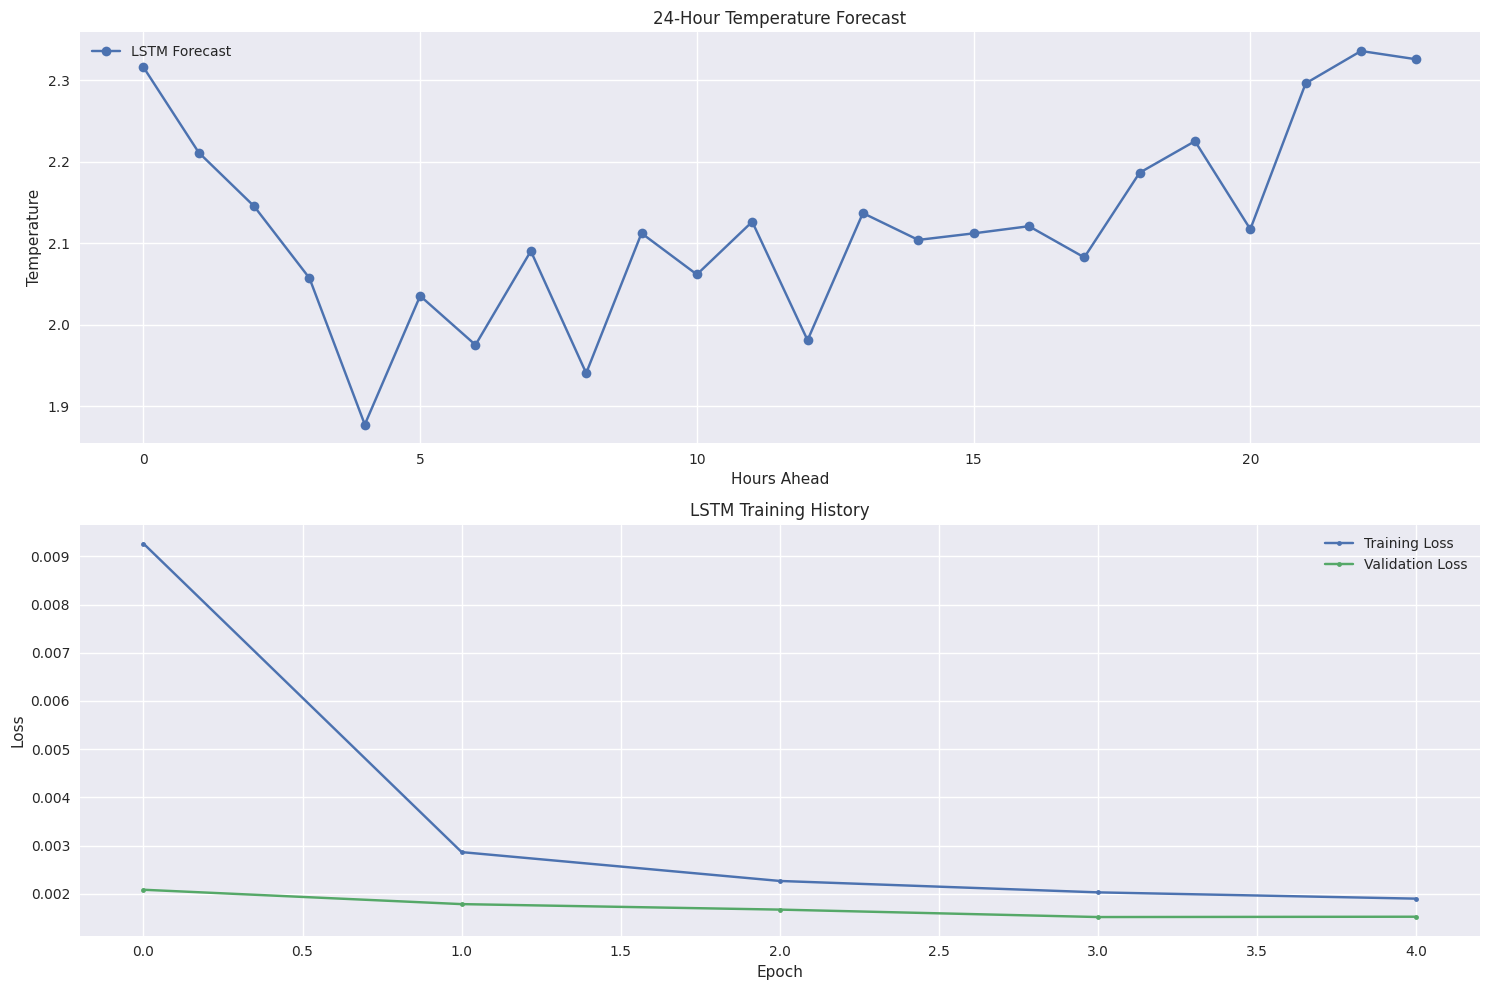

In [20]:
def run_predictions(data):
    """
    Run LSTM predictions with improved plotting
    """
    predictor = WeatherPredictor(data)
    
    # Train and evaluate LSTM
    lstm_history, (lstm_train_pred, lstm_test_pred) = predictor.train_lstm(
        target_variable='T',
        sequence_length=24,
        forecast_horizon=24,
        epochs=5
    )
    
    # Make future predictions
    lstm_future = predictor.make_future_predictions(steps=24)
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
    
    # Plot forecast
    ax1.plot(range(24), lstm_future, label='LSTM Forecast', marker='o')
    ax1.set_title('24-Hour Temperature Forecast')
    ax1.set_xlabel('Hours Ahead')
    ax1.set_ylabel('Temperature')
    ax1.legend()
    ax1.grid(True)
    
    # Plot loss history
    ax2.plot(lstm_history.history['loss'], label='Training Loss', marker='.')
    ax2.plot(lstm_history.history['val_loss'], label='Validation Loss', marker='.')
    ax2.set_title('LSTM Training History')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)
    
    # Adjust layout
    plt.tight_layout()
    
    return predictor, fig


print("\nRunning weather predictions...")
predictor, fig = run_predictions(data)